## Assignment

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest




from sqlalchemy import create_engine


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

performance = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [82]:
# Iterating the columns and removing blank spaces

for c in performance.columns:
    performance.rename(columns={c:c.replace(' ','_')},inplace=True)

performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

_Variables are not normally distributed. After Box-cox applied, variables seem as normal distributed but they are not based on jargue-bera amd mpmal test_

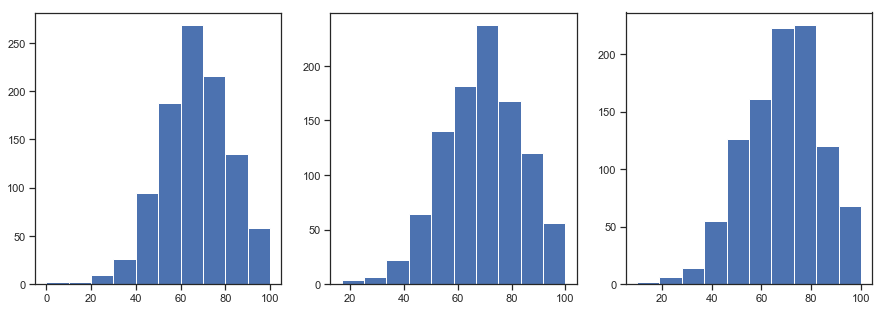

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(performance['math_score'])
plt.subplot(1,3,2)
plt.hist(performance['reading_score'])
plt.subplot(1,3,3)
plt.hist(performance['writing_score'])

plt.show()

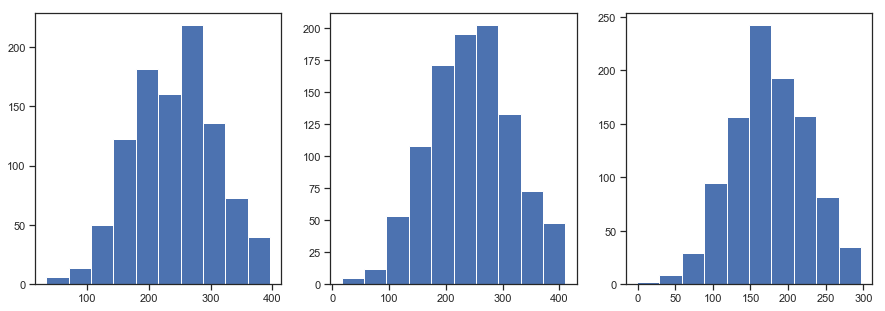

In [84]:
#Sustituir el 0 de performance[performance['math_score']==0]['math_score'] = 0.1

performance.loc[59,'math_score']=0.1

boxcox_reading,_ = boxcox(performance['reading_score'])
boxcox_writing,_ = boxcox(performance['writing_score'])
boxcox_math,_ = boxcox(performance['math_score'])

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(boxcox_reading)

plt.subplot(1,3,2)
plt.hist(boxcox_writing)
plt.subplot(1,3,3)
plt.hist(boxcox_math)

plt.show()


In [85]:
#Confirm using Jarque-Bera and Normal tests also confirm this

jar_boxcox_reading = jarque_bera(boxcox_reading)
jar_boxcox_writing = jarque_bera(boxcox_writing)
jar_boxcox_math = jarque_bera(boxcox_math)


normboxcox_math = normaltest(boxcox_math)
normboxcox_writing = normaltest(boxcox_writing)
nomrboxcox_reading = normaltest(boxcox_reading)


print("Jarque-Bera test for reading score statistics is {0} and p value is {1}".format(jar_boxcox_reading[0], jar_boxcox_reading[1]))
print("Jarque-Bera test for math score statistics is {0} and p value is {1}".format(jar_boxcox_math[0], jar_boxcox_math[1]))
print("Jarque-Bera test for writing score statistics is {0} and p value is {1}".format(jar_boxcox_writing[0], jar_boxcox_writing[1]))

print("Normality test statistics for math is {0} and p value is {1}".format(normboxcox_math[0], normboxcox_math[1]))
print("Normality test statistics for reading is {0} and p value is {1}".format(nomrboxcox_reading[0], nomrboxcox_reading[1]))

print("Normality test statistics for writing is {0} and p value is {1}".format(normboxcox_writing[0], normboxcox_writing[1]))



Jarque-Bera test for reading score statistics is 4.119778573559666 and p value is 0.127468081515408
Jarque-Bera test for math score statistics is 0.9154369202158599 and p value is 0.6327255886272433
Jarque-Bera test for writing score statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics for math is 0.8414934282273698 and p value is 0.6565563768144929
Normality test statistics for reading is 5.282274606965809 and p value is 0.07128015626992971
Normality test statistics for writing is 6.267311355052559 and p value is 0.04355827085003712


### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

_Variable for exam score is not normal distributed._


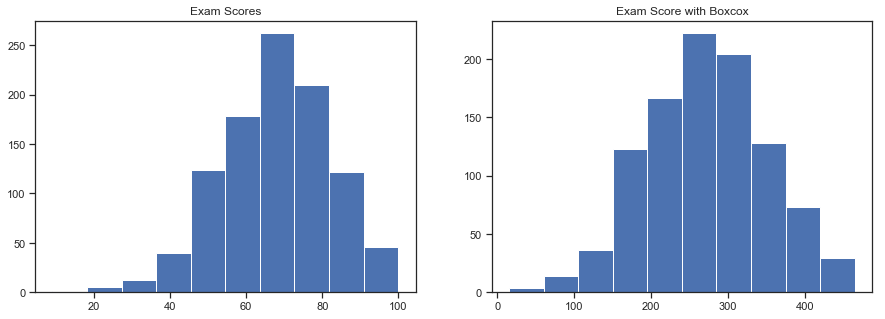

In [86]:
performance['exam_score']=(performance['math_score'] + performance['reading_score'] + performance['writing_score']) /3

boxcox_exam,_ = boxcox(performance['exam_score'])

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(performance['exam_score'])
plt.title('Exam Scores')
plt.subplot(1,2,2)
plt.hist(boxcox_exam)
plt.title('Exam Score with Boxcox')

plt.show()



In [87]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

#Confirm using Jarque-Bera and Normal tests also confirm this:

jb_stats = jarque_bera(boxcox_exam)
norm_test = normaltest(boxcox_exam)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))

print("Normality test statistics is {0} and p value is {1}".format(norm_test[0], norm_test[1]))




Jarque-Bera test statistics is 2.4370700045443736 and p value is 0.2956629954167068
Normality test statistics is 2.7821614621487143 and p value is 0.248806266615156


### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

_All variables seems to be related to the target variable, so we might use all of them_



In [88]:
performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,exam_score
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667
1,female,group C,some college,standard,completed,69.0,90,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333
4,male,group C,some college,standard,none,76.0,78,75,76.333333


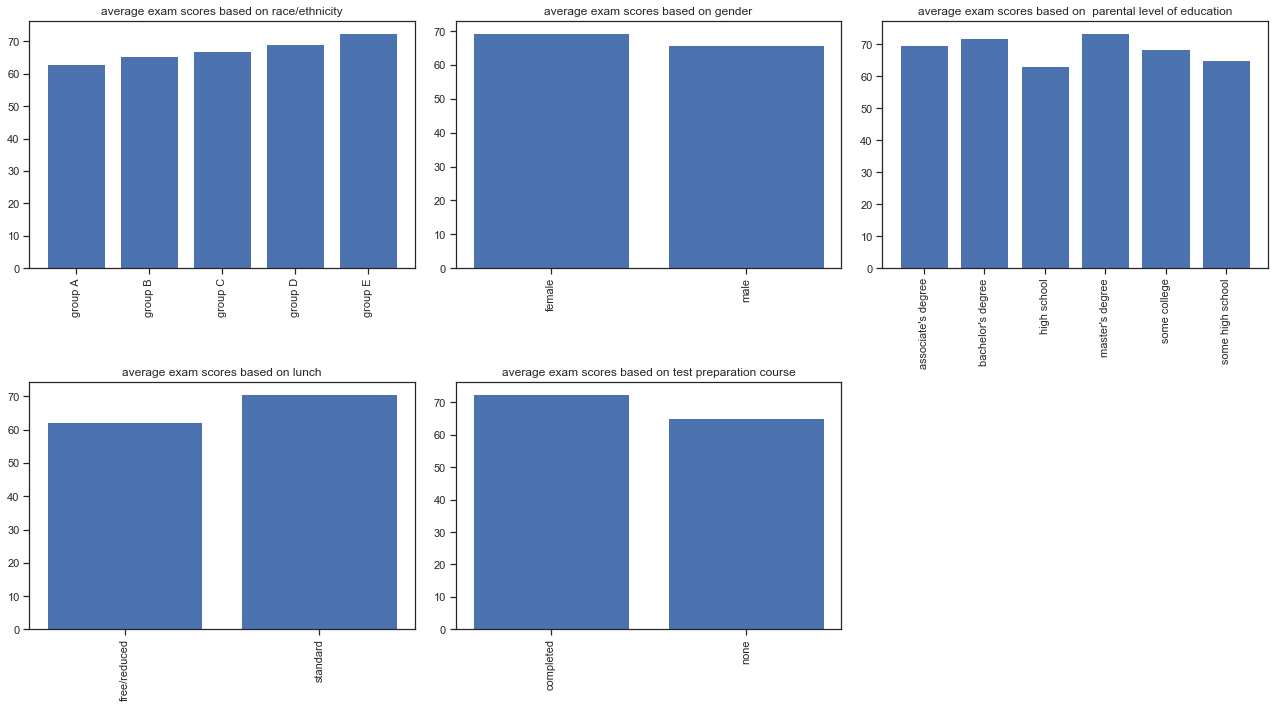

In [89]:
performance
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(performance.groupby("race/ethnicity")
        ["exam_score"].mean().index, performance.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores based on race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(performance.groupby("gender")
        ["exam_score"].mean().index, performance.groupby("gender")["exam_score"].mean())

plt.title("average exam scores based on gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(performance.groupby("parental_level_of_education")
        ["exam_score"].mean().index, performance.groupby("parental_level_of_education")["exam_score"].mean())

plt.title("average exam scores based on  parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(performance.groupby("lunch")
        ["exam_score"].mean().index, performance.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores based on lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(performance.groupby("test_preparation_course")
        ["exam_score"].mean().index, performance.groupby("test_preparation_course")["exam_score"].mean())

plt.title("average exam scores based on test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()